In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import requests
from io import StringIO
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import nbformat
from IPython import get_ipython

In [10]:
# Load the main.ipynb file
with open("main.ipynb", "r") as f:
    nb = nbformat.read(f, as_version=4)

# Execute all cells in `main.ipynb`
for cell in nb.cells:
    if cell.cell_type == "code":
        get_ipython().run_cell(cell.source)

# Now you can call the function defined in `main.ipynb`
df2 = get_cleaned_data2()
print(df2.head())

   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0                 2                              Y

/Users/haigbedros/Desktop/MSDS/Fall 24/DATA 622/HW4/data622-assignment4/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/haigbedros/Desktop/MSDS/Fall 24/DATA 622/HW4/data622-assignment4/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [11]:
# General information about the DataFrame
print(df2.info())

# Summary statistics of numerical columns
print(df2.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    87 non-null     object 
 1   age                       87 non-null     int64  
 2   university                87 non-null     object 
 3   degree_level              87 non-null     object 
 4   degree_major              87 non-null     object 
 5   academic_year             87 non-null     object 
 6   cgpa                      87 non-null     float64
 7   residential_status        87 non-null     object 
 8   campus_discrimination     87 non-null     object 
 9   sports_engagement         87 non-null     object 
 10  average_sleep             87 non-null     float64
 11  study_satisfaction        87 non-null     float64
 12  academic_workload         87 non-null     int64  
 13  academic_pressure         87 non-null     int64  
 14  financial_co

## Catagorical Variable exploration

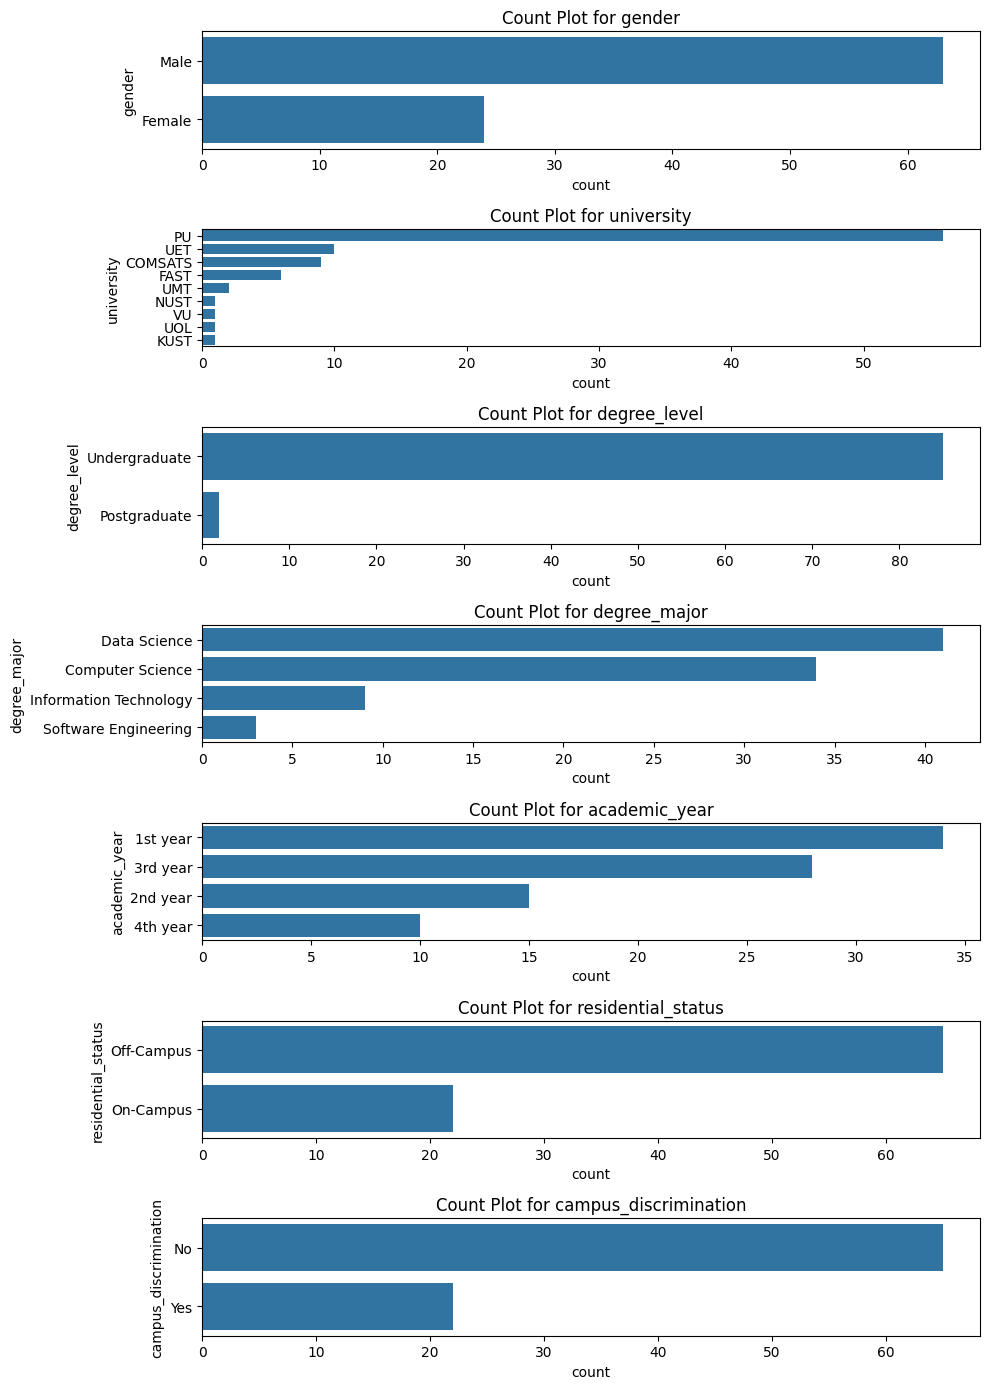

In [15]:
categorical_columns = ['gender', 'university', 'degree_level', 'degree_major', 'academic_year', 
                       'residential_status', 'campus_discrimination']

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, len(categorical_columns) * 2))
for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=df2, y=col, order=df2[col].value_counts().index, ax=ax)
    ax.set_title(f"Count Plot for {col}")
plt.tight_layout()
plt.show()

1. **Gender**: Majority are male students, with females being a smaller proportion.
2. **University**: Most students are from "PU," followed by "COMSATS" and "FAST."
3. **Degree Level**: The majority are undergraduates, with few postgraduates.
4. **Degree Major**: "Computer Science" and "Data Science" dominate, with smaller counts in "Information Technology" and "Software Engineering."
5. **Academic Year**: Most students are in their 1st or 3rd year, with fewer in 2nd and 4th years.
6. **Residential Status**: More students live off-campus compared to on-campus.
7. **Campus Discrimination**: A majority report no discrimination, but a notable proportion report experiencing discrimination.

## Numerical Variable Exploration

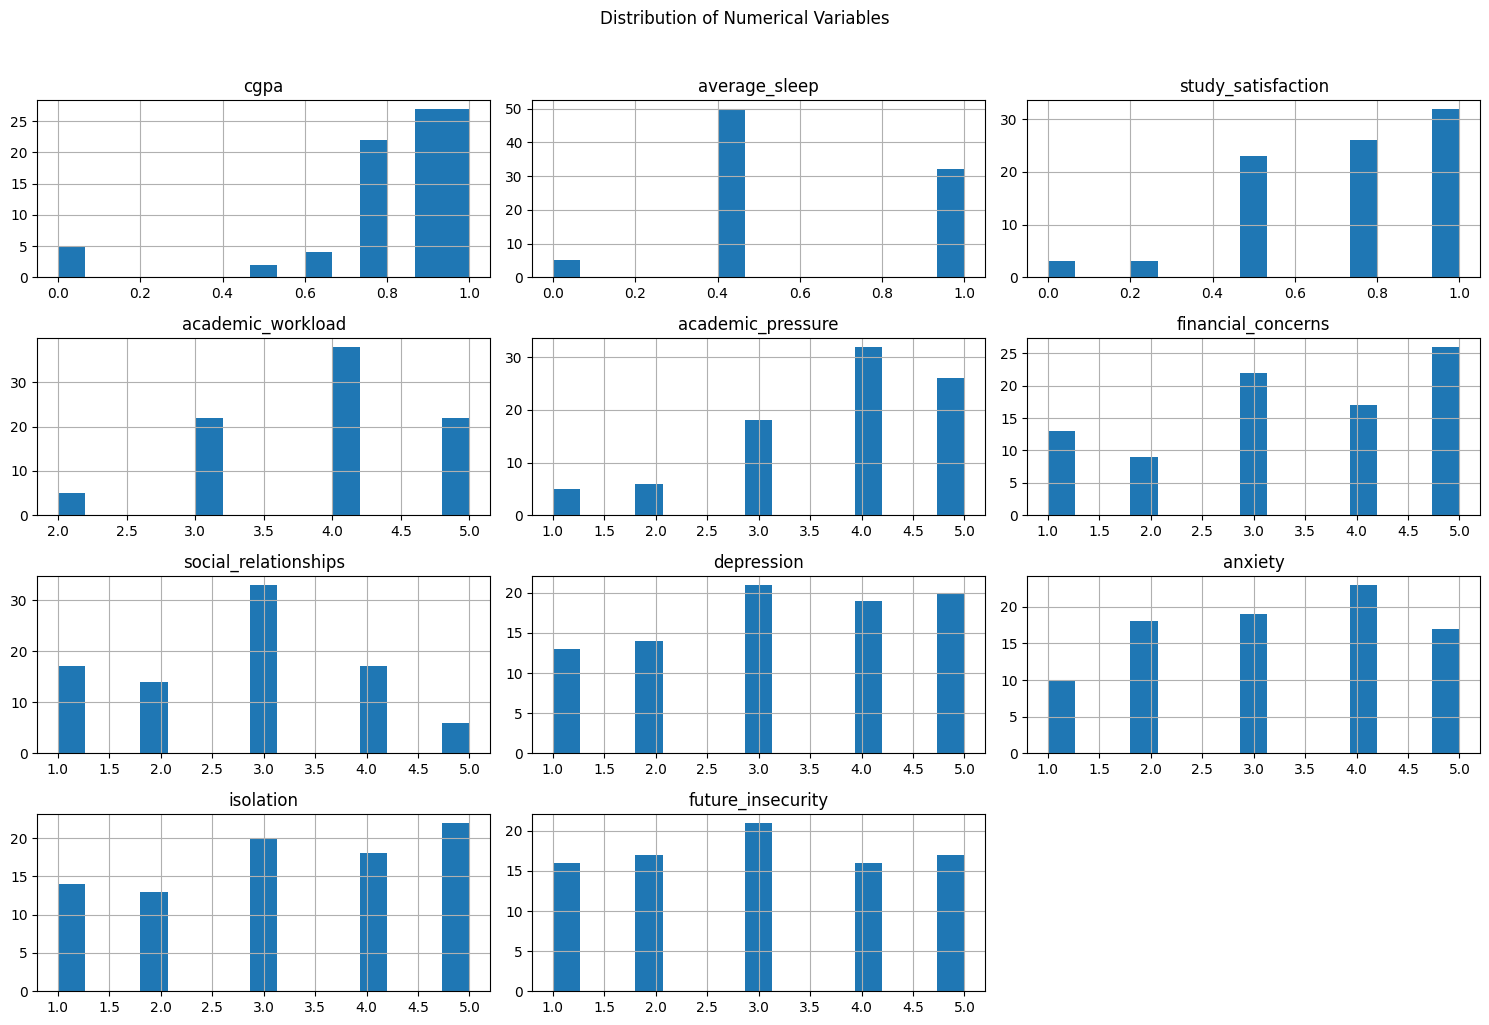

In [ ]:
numerical_columns = ['cgpa', 'average_sleep', 'study_satisfaction', 'academic_workload', 'academic_pressure',
                     'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']


# histograms
df2[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Distribution of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()


1. **CGPA**: Skewed towards higher values, indicating most students have a good academic performance.
2. **Average Sleep**: Majority of students report average sleep durations in the middle range.
3. **Study Satisfaction**: Skewed towards high satisfaction levels, showing students are generally content with their studies.
4. **Academic Workload**: Concentrated around moderate to high levels, with fewer reporting lower workloads.
5. **Academic Pressure**: Most students experience moderate to high academic pressure.
6. **Financial Concerns**: Fairly evenly distributed, with slight peaks in higher values.
7. **Social Relationships**: Majority rate their social relationships in the mid-range, with fewer in extreme ratings.
8. **Depression**: Moderate levels of depression are common, with a noticeable presence of both low and high levels.
9. **Anxiety**: Similar to depression, anxiety is fairly evenly distributed across levels.
10. **Isolation**: Students report moderate to high levels of isolation, with fewer reporting lower levels.
11. **Future Insecurity**: Well-distributed, but higher ratings (indicating greater insecurity) are prominent.

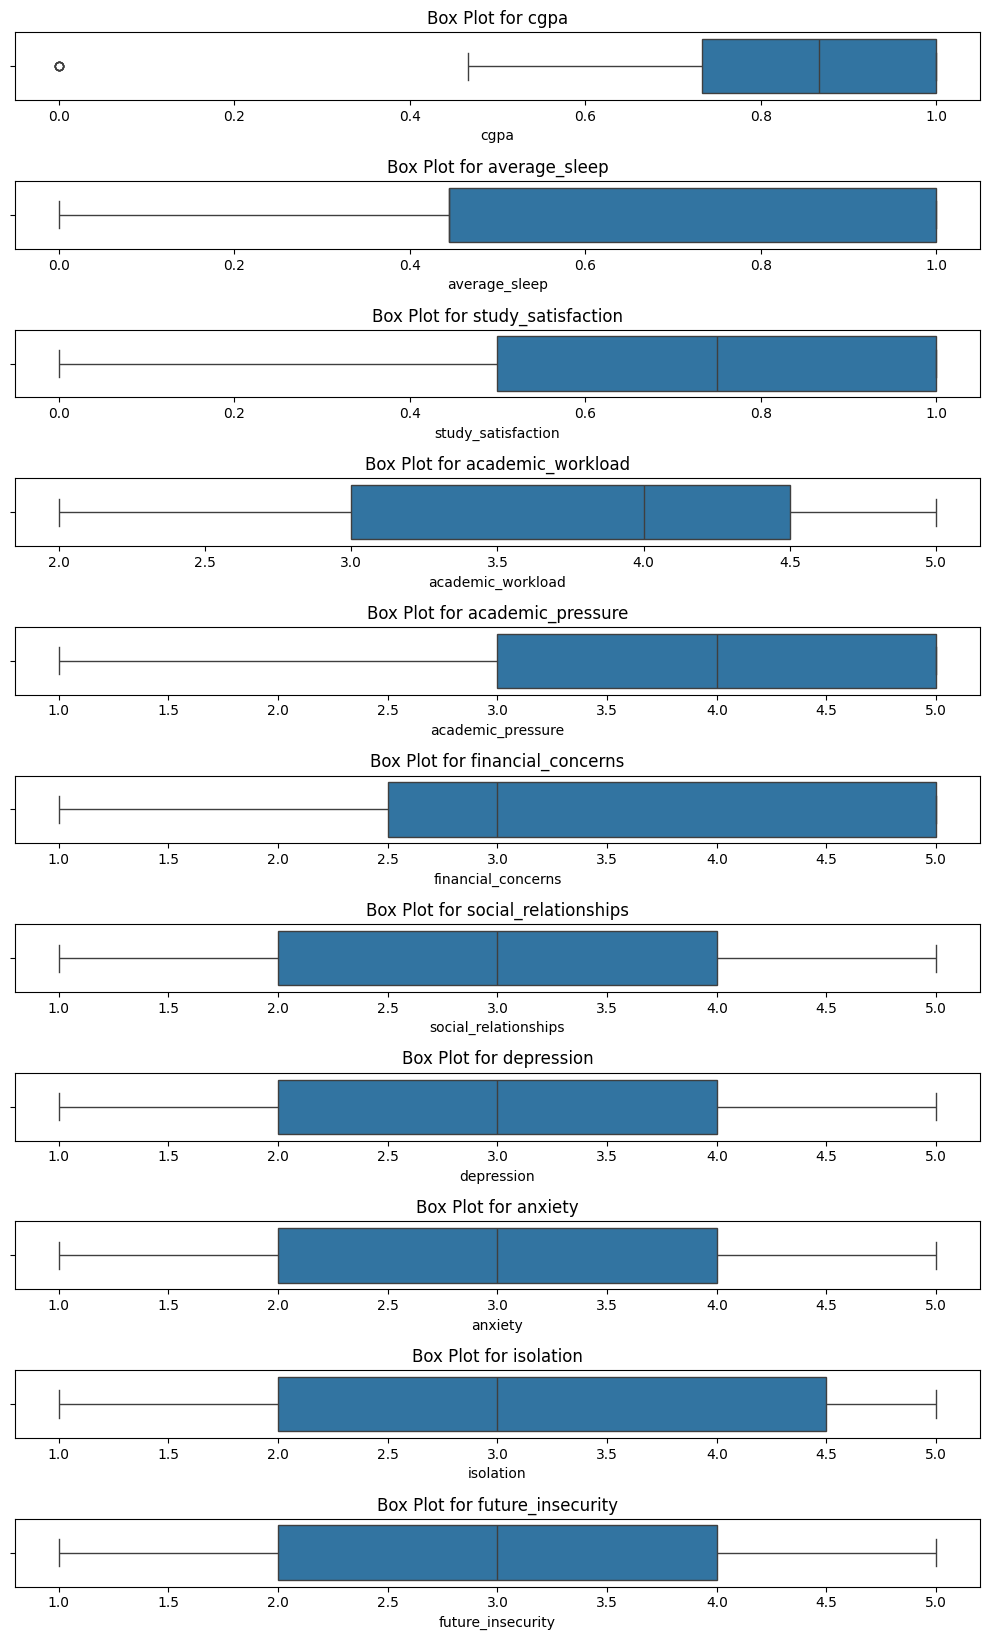

In [16]:
# Boxplots to check outliers
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, len(numerical_columns) * 1.5))
for ax, col in zip(axes, numerical_columns):
    sns.boxplot(data=df2, x=col, ax=ax)
    ax.set_title(f"Box Plot for {col}")
plt.tight_layout()
plt.show()

1. **CGPA**: 
   - Most values are concentrated near the higher end.
   - A single significant outlier exists on the lower end.

2. **Average Sleep**:
   - Values are spread around the mid-range, with no clear outliers.

3. **Study Satisfaction**:
   - High levels dominate, with no visible outliers.

4. **Academic Workload**:
   - Skewed toward higher workload, no significant outliers.

5. **Academic Pressure**:
   - Concentrated around the higher range, no visible outliers.

6. **Financial Concerns**:
   - Broad distribution, no significant outliers.

7. **Social Relationships**:
   - Most values fall in the mid-range, with no clear outliers.

8. **Depression**:
   - Values are evenly distributed, no visible outliers.

9. **Anxiety**:
   - Similar to depression, no significant outliers.

10. **Isolation**:
   - Concentrated toward higher levels, no clear outliers.

11. **Future Insecurity**:
   - Broadly distributed, no visible outliers.

### Insights:
- The dataset is clean overall, with only one significant outlier in the `CGPA` variable.
- Most other variables are evenly distributed without extreme values.

## Correlation Analysis

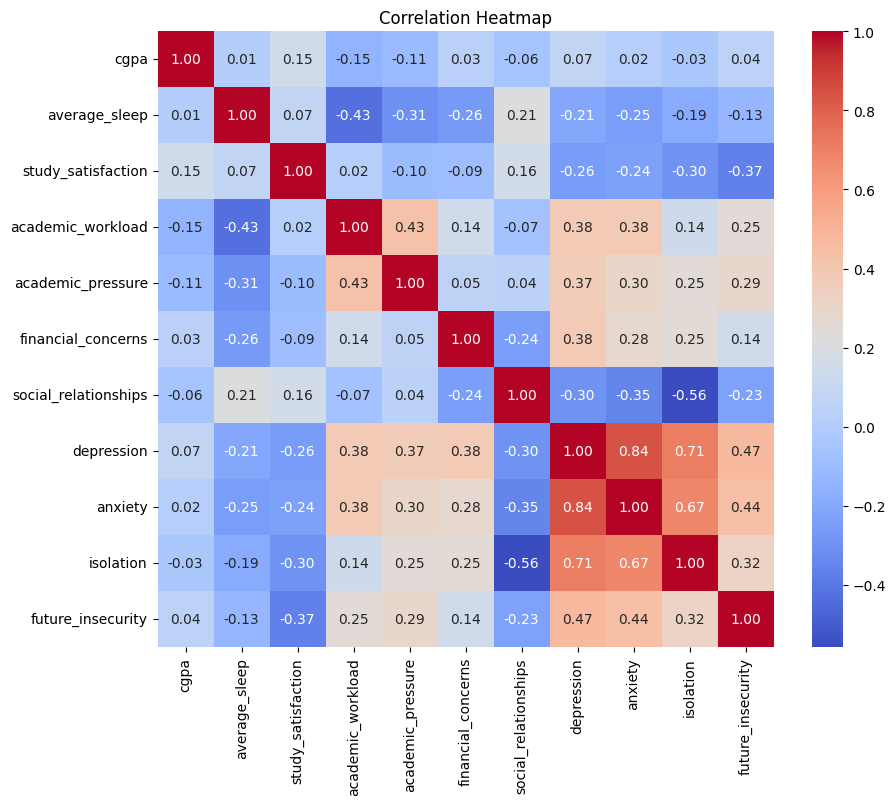

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

1. **Strong Positive Correlations**:
   - **Depression & Anxiety**: These are highly correlated (0.84), indicating that students experiencing depression are likely to experience anxiety as well.
   - **Depression & Isolation**: A strong correlation (0.71) suggests that feelings of depression often align with feelings of isolation.
   - **Anxiety & Isolation**: Strong correlation (0.67), reinforcing the relationship between mental health struggles and isolation.

2. **Moderate Positive Correlations**:
   - **Academic Workload & Academic Pressure**: A correlation of 0.43 indicates that higher workloads often coincide with increased academic pressure.
   - **Financial Concerns & Depression**: A moderate correlation (0.38) suggests financial issues can contribute to depressive feelings.

3. **Weak or No Correlation**:
   - **CGPA** has little to no correlation with most variables, indicating that academic performance is relatively independent of mental health and lifestyle factors.
   - **Average Sleep** is weakly correlated with other variables, indicating minimal direct relationships.

4. **Negative Correlations**:
   - **Social Relationships & Isolation**: A strong negative correlation (-0.56) shows that better social relationships reduce isolation.
   - **Social Relationships & Anxiety/Depression**: Moderate negative correlations (-0.35, -0.30), highlighting the positive impact of healthy social connections on mental well-being.

### Key Insights:
- Mental health variables (depression, anxiety, and isolation) are closely interrelated.
- Academic workload and pressure moderately influence mental health.
- Strong social relationships are protective against poor mental health and isolation.

## Mental Health Variables by Gender

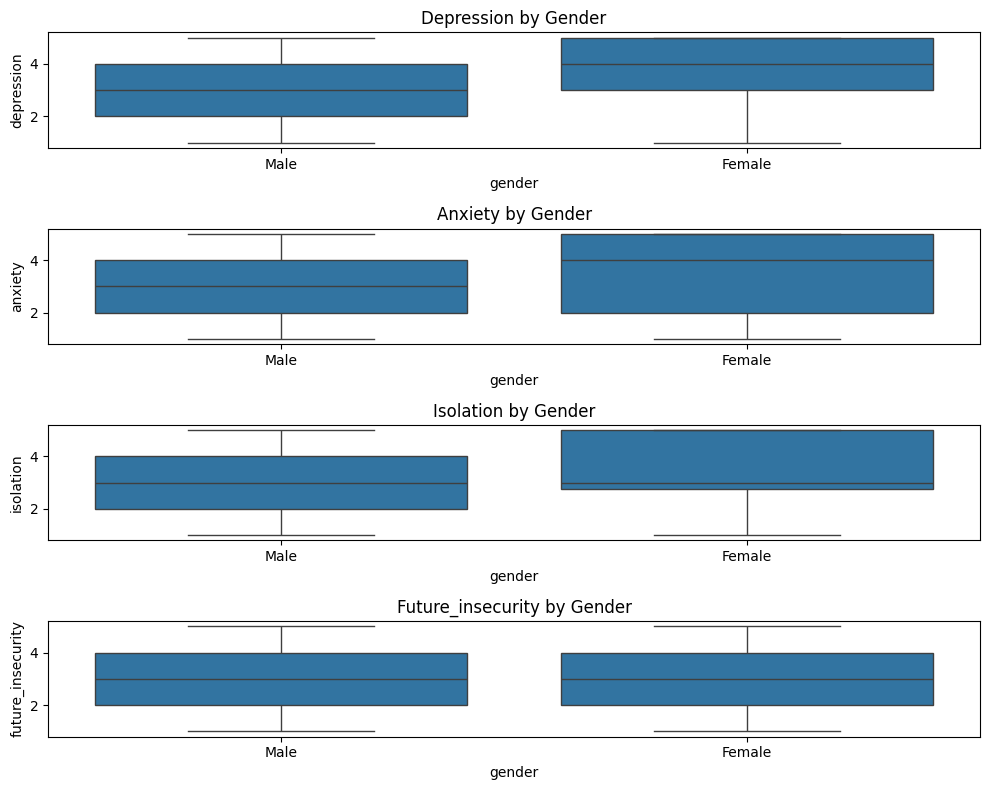

In [19]:
mental_health_columns = ['depression', 'anxiety', 'isolation', 'future_insecurity']

fig, axes = plt.subplots(nrows=len(mental_health_columns), ncols=1, figsize=(10, len(mental_health_columns) * 2))
for ax, col in zip(axes, mental_health_columns):
    sns.boxplot(data=df2, x='gender', y=col, ax=ax)
    ax.set_title(f"{col.capitalize()} by Gender")
plt.tight_layout()
plt.show()

1. **Depression**:
   - Both males and females have a similar median level of depression.
   - Females show a slightly broader range of depression levels compared to males.

2. **Anxiety**:
   - The distributions of anxiety levels are similar for both genders, with overlapping medians and interquartile ranges.

3. **Isolation**:
   - Males and females report comparable levels of isolation, with similar medians and ranges.

4. **Future Insecurity**:
   - Future insecurity levels are evenly distributed across genders, with little to no noticeable difference.

### Insights:
- Mental health variables (depression, anxiety, isolation, and future insecurity) appear consistent across genders, with no significant outliers or drastic differences in the distributions.
- This suggests that gender may not be a strong factor in influencing these mental health variables in this dataset.

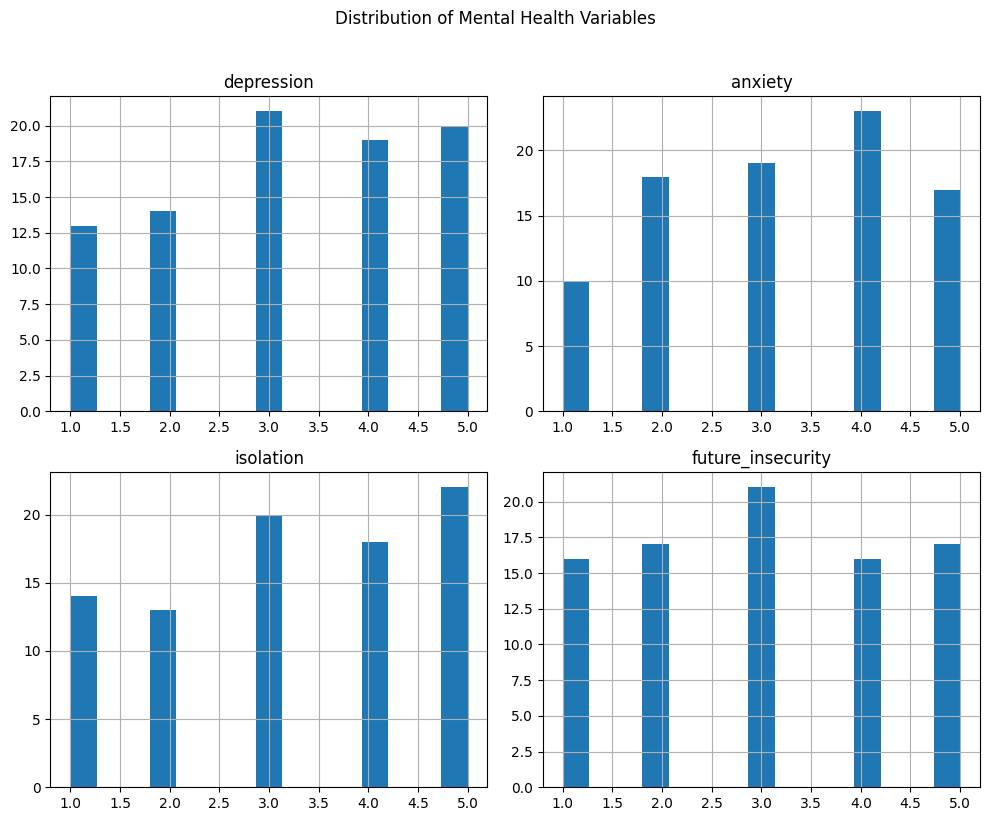

In [20]:
# Distribution of Mental Health Variables
df2[mental_health_columns].hist(bins=15, figsize=(10, 8))
plt.suptitle("Distribution of Mental Health Variables", y=1.02)
plt.tight_layout()
plt.show()

1. **Depression**: Fairly even distribution, with a slight peak at levels 3 and 5.
2. **Anxiety**: Most students report moderate to high levels (3-5).
3. **Isolation**: Similar to anxiety, with more students in higher ranges (3-5).
4. **Future Insecurity**: Skewed toward moderate levels (3), but present across the spectrum.

## Relationship between variables

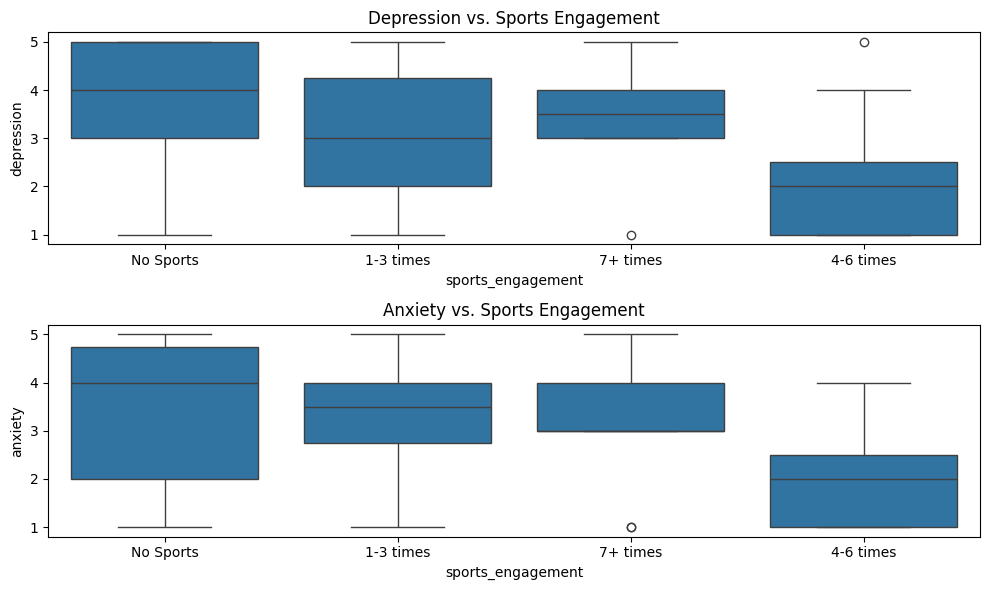

In [21]:
# Sports Engagement vs Mental Health
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
sns.boxplot(data=df2, x='sports_engagement', y='depression', ax=axes[0])
axes[0].set_title("Depression vs. Sports Engagement")

sns.boxplot(data=df2, x='sports_engagement', y='anxiety', ax=axes[1])
axes[1].set_title("Anxiety vs. Sports Engagement")
plt.tight_layout()
plt.show()

1. **Depression**:
   - Highest levels are reported by students with no sports engagement.
   - Depression decreases with increasing sports engagement, with the lowest levels observed in the `4-6 times` group.

2. **Anxiety**:
   - Similar trend as depression: those with no sports engagement experience higher anxiety.
   - Anxiety levels are noticeably lower in students engaging in sports `4-6 times` or `7+ times`.

### Insights:
- Sports engagement has a noticeable positive impact on mental health, reducing both depression and anxiety levels. Students participating in sports more frequently show better mental health outcomes.

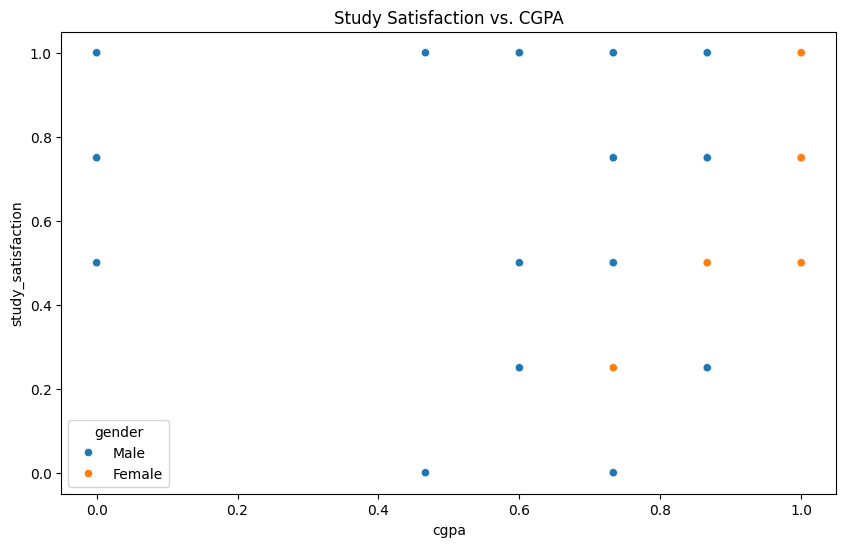

In [22]:
# CGPA vs Study Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='cgpa', y='study_satisfaction', hue='gender')
plt.title("Study Satisfaction vs. CGPA")
plt.show()

1. **General Observation**:
   - No clear correlation between CGPA and study satisfaction; students with similar CGPAs report a wide range of satisfaction levels.

2. **Gender-Specific Insights**:
   - Both males and females are distributed similarly, with no significant gender-based differences in study satisfaction at any CGPA level.

### Insight:
Study satisfaction appears to be independent of CGPA, suggesting factors other than academic performance influence how satisfied students feel. Let me know if you'd like to explore this further!

## Discrimination and mental health

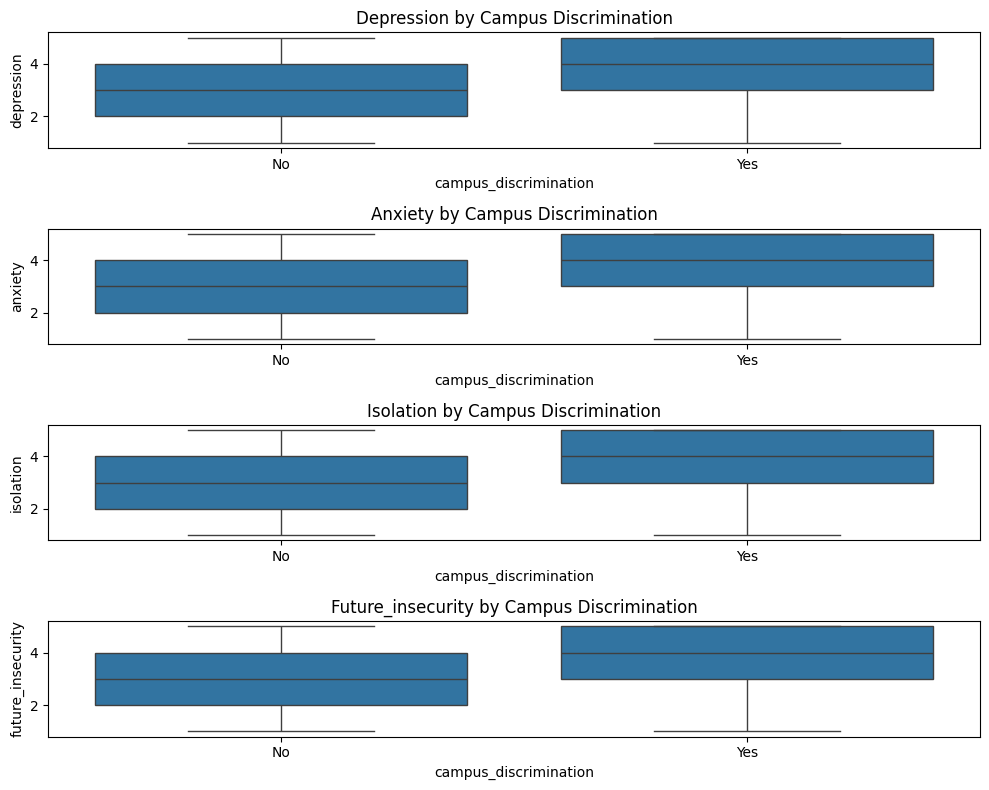

In [23]:
fig, axes = plt.subplots(nrows=len(mental_health_columns), ncols=1, figsize=(10, len(mental_health_columns) * 2))
for ax, col in zip(axes, mental_health_columns):
    sns.boxplot(data=df2, x='campus_discrimination', y=col, ax=ax)
    ax.set_title(f"{col.capitalize()} by Campus Discrimination")
plt.tight_layout()
plt.show()

1. **Depression**:
   - Students who experienced campus discrimination report higher levels of depression compared to those who did not.

2. **Anxiety**:
   - Anxiety levels are higher among students who experienced discrimination, with noticeable variability.

3. **Isolation**:
   - Isolation is more pronounced among students facing discrimination, suggesting a social impact.

4. **Future Insecurity**:
   - Future insecurity is higher in students who reported campus discrimination, indicating broader concerns about their well-being.

### Insights:
Campus discrimination has a clear negative impact on mental health, with higher levels of depression, anxiety, isolation, and insecurity observed in affected students. Let me know if you'd like further analysis!